In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [64]:
df = pd.read_csv('height-weight.csv')

In [113]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

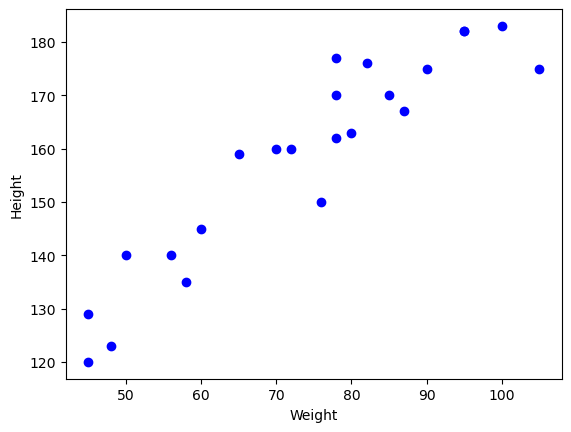

In [114]:
#scatter plot

plt.scatter(df['Weight'], df['Height'], color='blue', label="training data")
plt.xlabel("Weight")
plt.ylabel("Height")
# y_ticks = plt.gca().get_yticks()
# plt.yticks(y_ticks, [f'{tick:,.2f}' for tick in y_ticks])


In [68]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


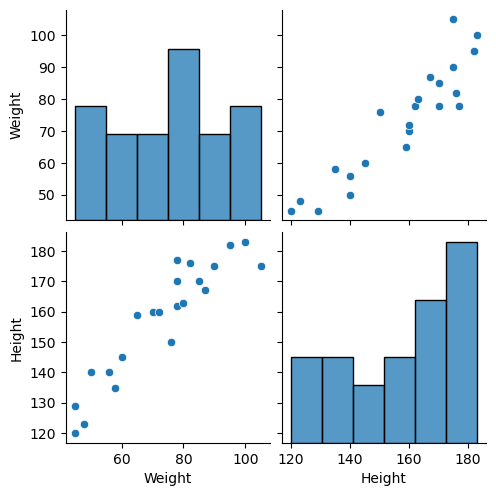

In [69]:
#seaborn

import seaborn as sns

sns.pairplot(df)

In [70]:
#dependent and independent 
#independt should be data frame
x = df[["Weight"]]
type(x)
x.head()

x1 = df["Weight"]

#dependent only one dim

y = df["Height"]

In [71]:
np.array(x).shape


(23, 1)

In [72]:
np.array(y).shape

(23,)

In [73]:
type(x1)

np.array(x1).shape

(23,)

In [115]:
# train test and split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [116]:
x_train

,Weight
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76
16,50


In [117]:
#standradization convert value with mean=0 and standrad devi =1


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)  #for independent


In [118]:

x_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [119]:
x_test = scaler.transform(x_test)

In [120]:
x_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [121]:
#apply sample linear reg

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [122]:
model.coef_

array([17.2982057])

In [123]:
model.intercept_

156.47058823529412

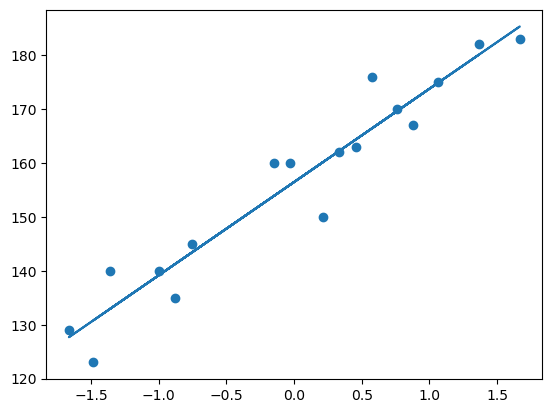

In [124]:
plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict(x_train))

In [125]:
#predict for test_data

y_pred = model.predict(x_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

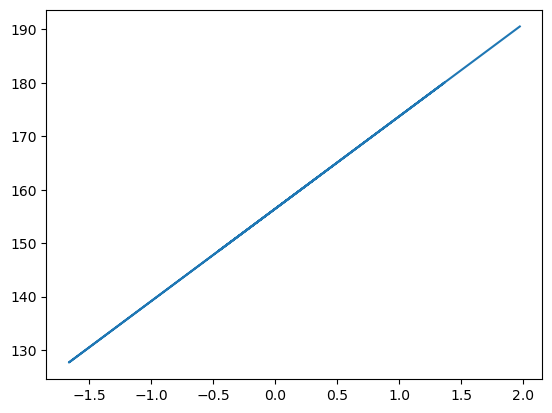

In [126]:
plt.plot(x_test, y_pred)

In [127]:
#performance metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [128]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


In [129]:
#r square
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.7360826717981276

In [130]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6701033397476595

In [134]:
model.predict(scaler.transform([[100]]))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([185.31934779])

In [104]:
#using ols
import statsmodels.api as sm

model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_test) 

predictions

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [105]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Fri, 16 Aug 2024   Prob (F-statistic):                       0.664
Time:                        00:26:51   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
#predict for new data

